<a href="https://colab.research.google.com/github/Dharani2905/miniproject/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving preprocessed_diabetes_data.csv to preprocessed_diabetes_data.csv


In [ ]:
diabetes_data = pd.read_csv('preprocessed_diabetes_data.csv')

In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.shape

(768, 9)

In [ ]:
## Lets check data types,columns names, null value counts, memory usage etc
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Get the details of each column
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


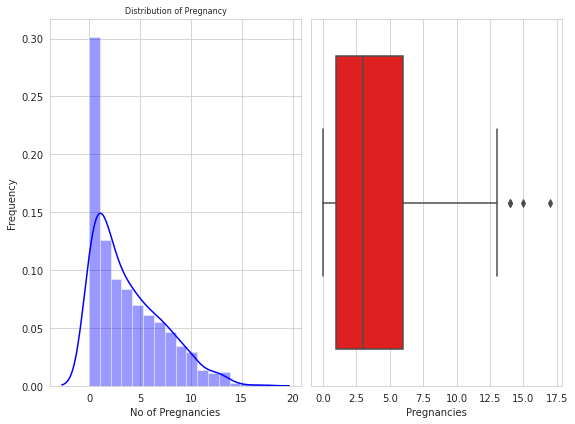

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (8,6))

plot00=sns.distplot(diabetes_data['Pregnancies'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('No of Pregnancies')
axes[0].set_ylabel('Frequency')
plt.tight_layout()


plot01=sns.boxplot('Pregnancies',data=diabetes_data,ax=axes[1],orient = 'v', color='r')
plt.tight_layout()


In [ ]:
# Replace zeros with NaN
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


**UNDERSTANDING DATA DISTRIBUTION**

In [ ]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


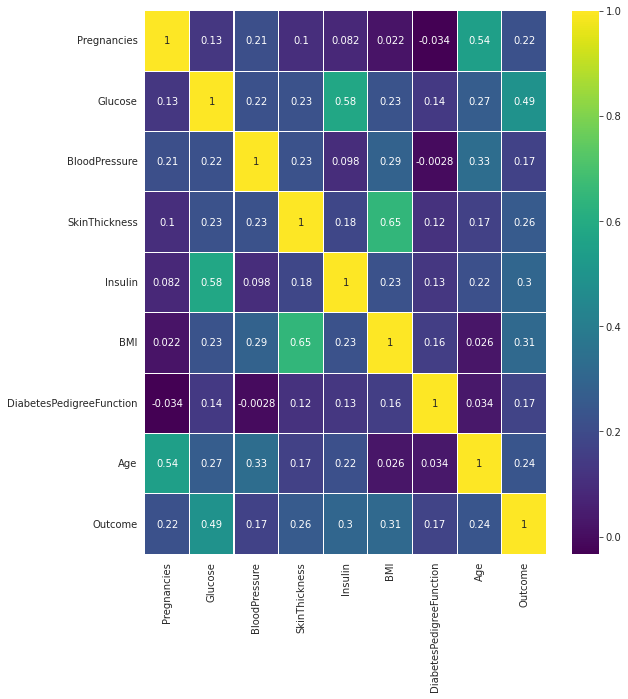

In [ ]:
plt.figure(figsize=(9,10))  
# sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')
sns.heatmap(diabetes_data.corr(),annot=True, cmap='viridis',linewidths=.1)
plt.show()

**Highlights**

1.It seems that Insulin is highly correlated with Glucose (about 0.58), BMI (about 0.23) and Age (about 0.22). It means that as the values of glucose, BMI and Age increase, the insuline is also increasing.
       
2.It seems logical also that fat and aged people might have high level of insuline in their bodies.

3.In the same way SkinThickness is highly correlated with BMI (about 0.65).

Impute NaN values of columns according to their distribution

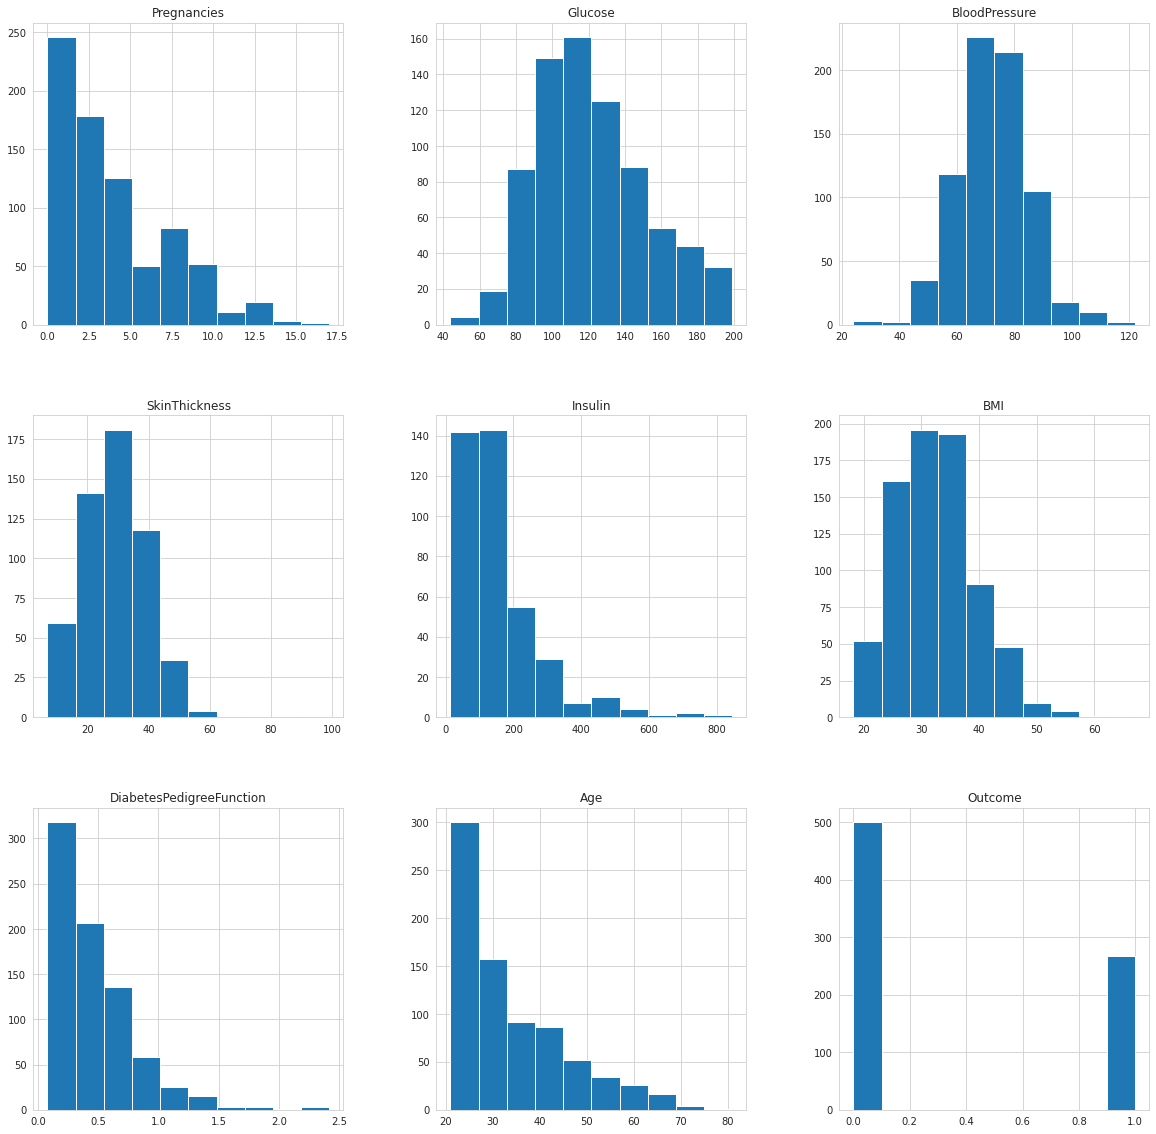

In [ ]:
# Check the distribution of each column, so that we can find wich is best central tendency (mean, medium or mode) to replace missing values:
diabetes_data.hist(figsize = (20,20))
plt.show()

**Highlights**

Distribution graph show that glucose & BloodPressure columns are almost normally distributed where as SkinThickness, Insulin and BMI are positive skewned.

So we will replace the missing values according to their distribution.

In [ ]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**Plotting after NaN value**

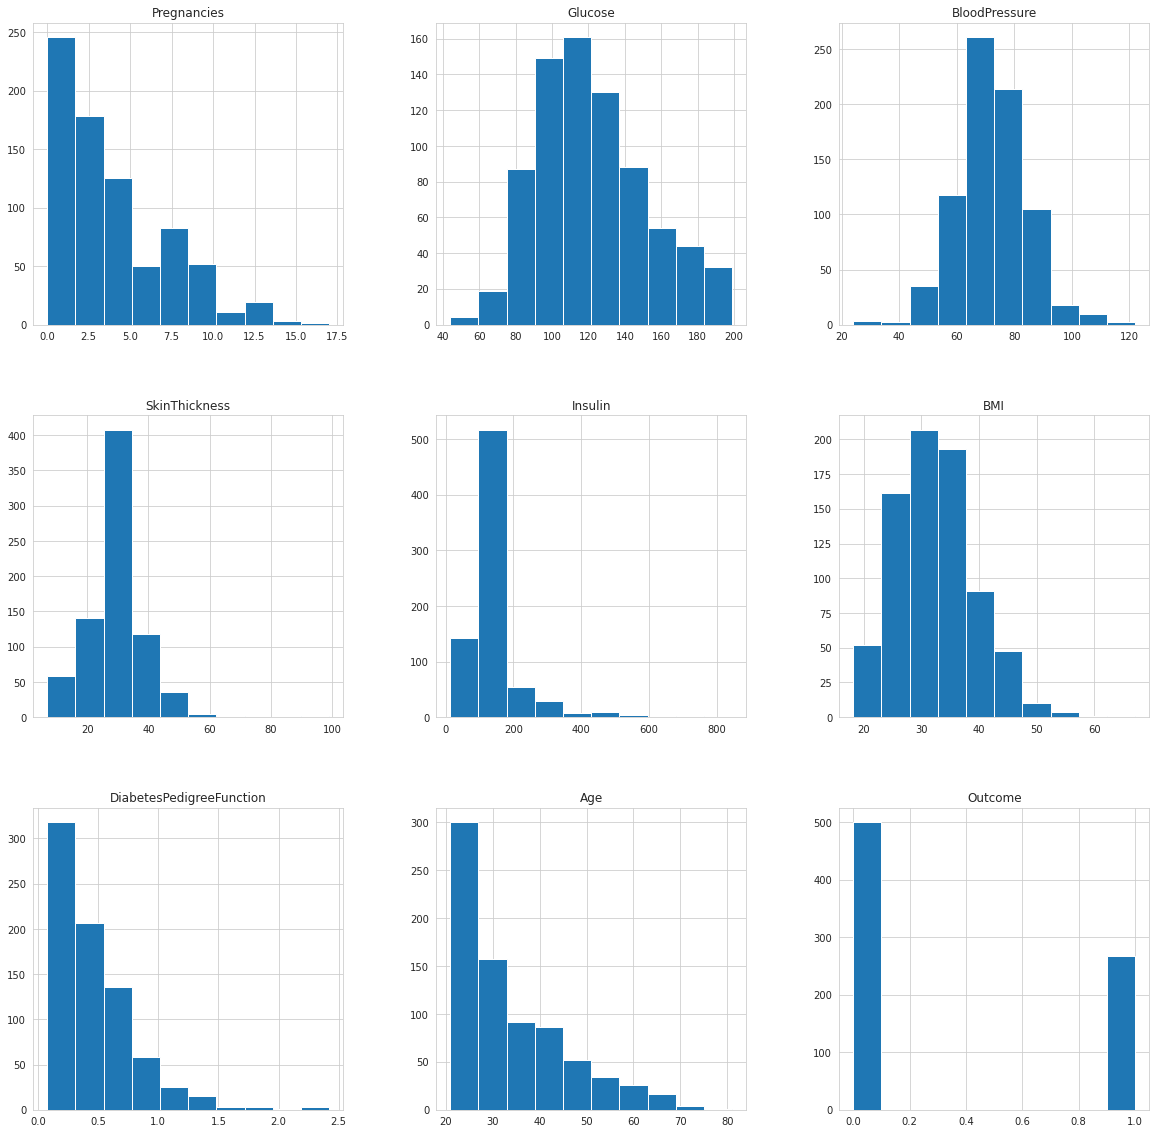

In [ ]:
diabetes_data.hist(figsize = (20,20))
plt.show()

**Checking balance of data**

We can produce a seaborn count plot to see how the output is dominated by one of the classes or not.

0    500
1    268
Name: Outcome, dtype: int64


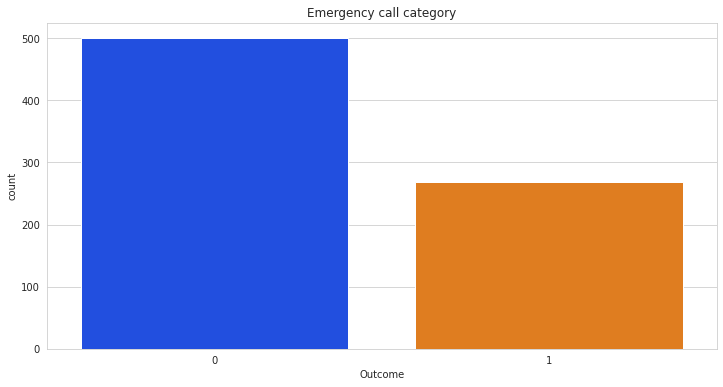

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome',data=diabetes_data, palette='bright')
plt.title("Emergency call category")

print(diabetes_data['Outcome'].value_counts())

**Highlights**

A total of 768 women were registered in the database. 268 womens about 35% were having diabetes, while 500 women about 65% were not.

The above graph shows that the dataset is biased towards non-diabetic patient. The number of non-diabetics is almost twice the number of diabetic patients.

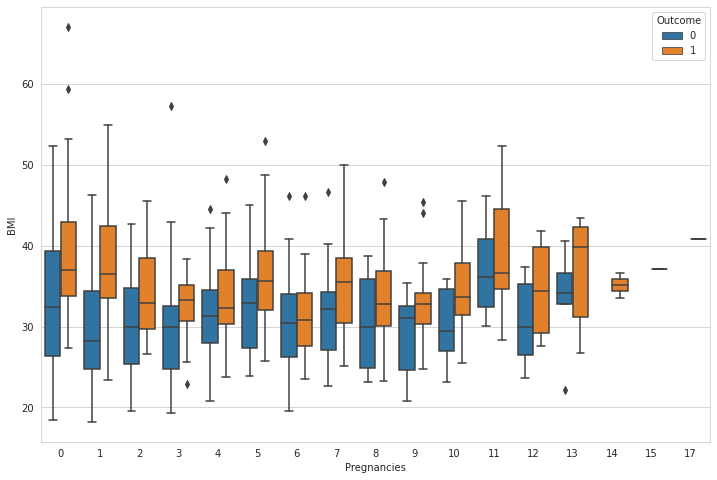

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pregnancies', y='BMI',data=diabetes_data, hue='Outcome')

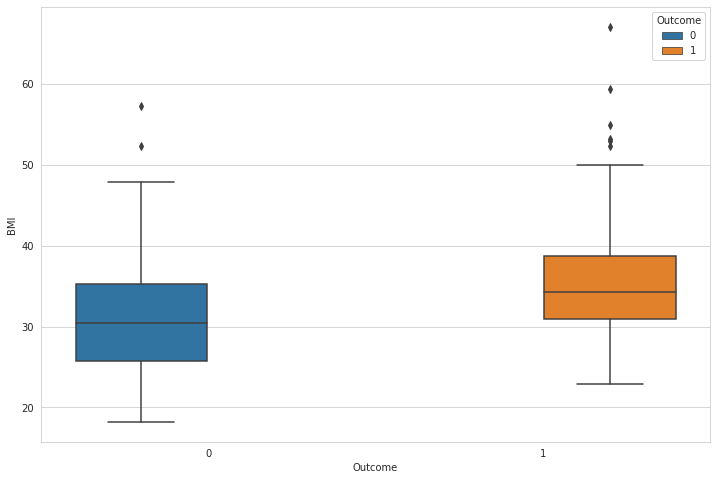

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=diabetes_data, hue='Outcome')

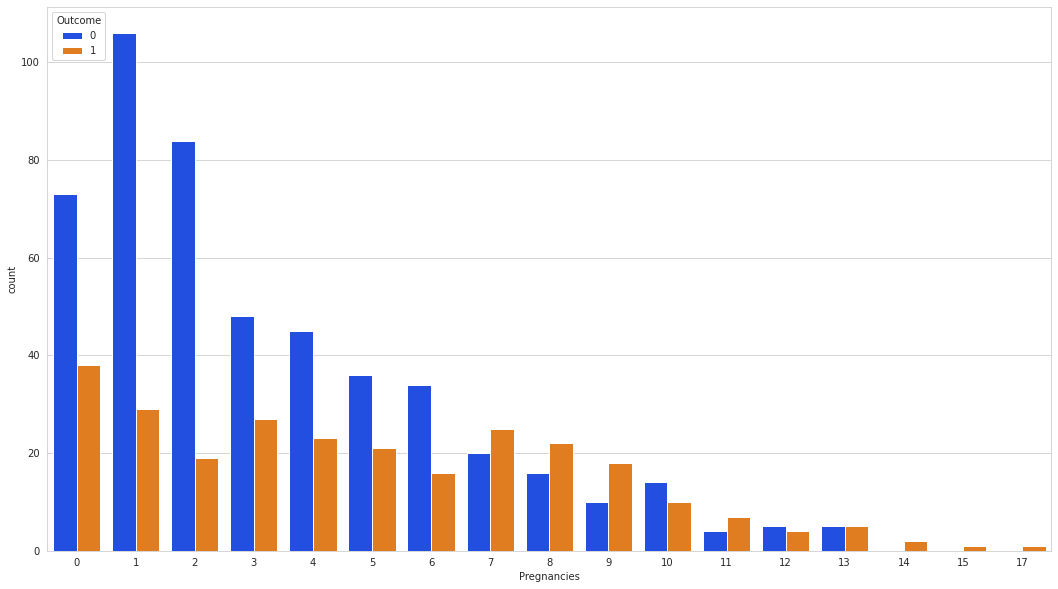

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(x='Pregnancies',data=diabetes_data,hue = 'Outcome', palette='bright')

**Highlights**

It is surprising that the median BMI does not immensely change as the number of pregnancies increases. I expected there to be a strong positive relationship between the number of pregnancies and the BMI. Those who tested positive for diabetes had higher BMIs than those who does not; yet, not a larger difference between the medians.

BMI will generally be higher for women who have had more numbers of pregnancy as well as for those who test positive for diabetes and that the relationship between the pedigree function and the test results will show that those who had a higher pedigree function tested positive and those who had a lower pedigree function tested negative.

**Pedigree function vs Diabetes**

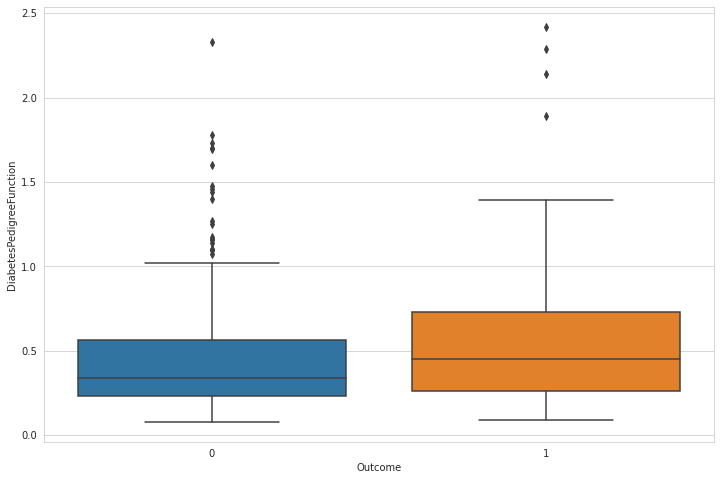

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction',data=diabetes_data)

**Highlights**

This graph more clearly shows the relationship between the pedigree function and the test results that the women got for diabetes. Since those who tested positive have a higher median and more high outliers, it is clear that the pedigree function does in fact, accurately help estimate the test results for diabetes. It shows that diabetes does follow genetics so those whose ancestors suffered from it have a higher risk of getting the disease themselves as well. Both test results show many outliers yet the outliers for those who tested negative seem to be lower pedigree functions than those who tested positive. This concluded that the genetic component is likely to contribute more to the emergence of diabetes in the Pima Indians and their offspring

**Pregnancy vs Diabetes**

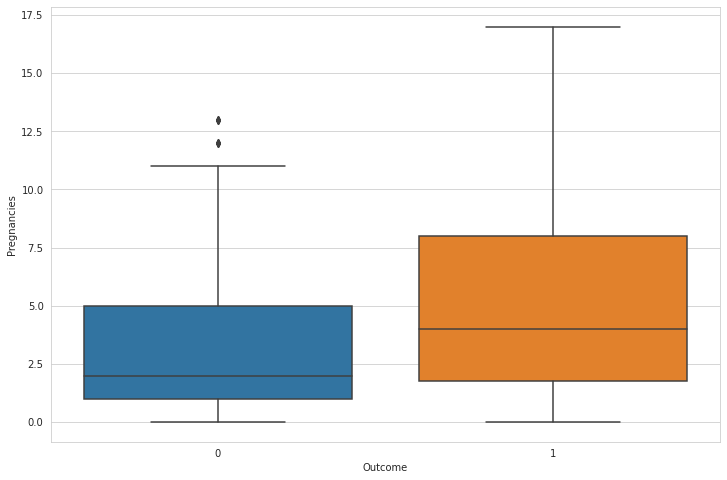

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='Pregnancies',data=diabetes_data)

**Highlights**

The average number of pregnancies is higher (4.9) in diabetic in comparing to (3.3) in non-diabetic women with a significant difference between them.

# BMI vs Diabetes

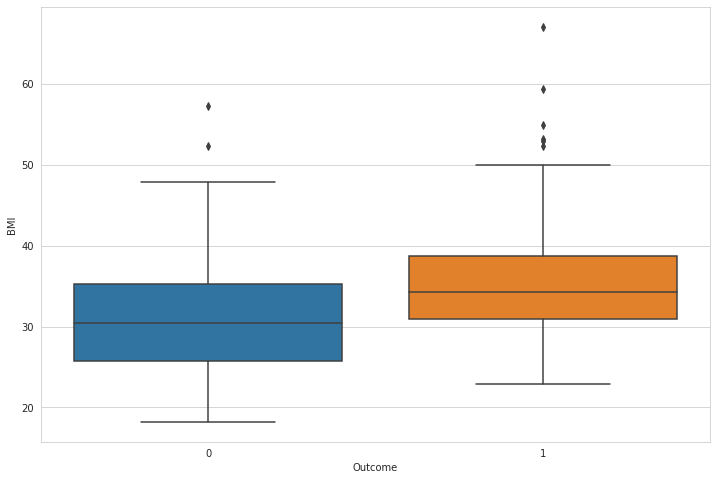

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=diabetes_data)

# Diabetic in Normal BMI

The probabiliy of having diabetic in a women having normal BMI. Please note that the range of noraml BMI is 18.5 to 25.

In [ ]:
normalBMIData = diabetes_data[(diabetes_data['BMI'] >= 18.5) & (diabetes_data['BMI'] <= 25)]
normalBMIData['Outcome'].value_counts()

0    101
1      7
Name: Outcome, dtype: int64

In [ ]:
notNormalBMIData = diabetes_data[(diabetes_data['BMI'] < 18.5) | (diabetes_data['BMI'] > 25)]
notNormalBMIData['Outcome'].value_counts()

0    399
1    261
Name: Outcome, dtype: int64

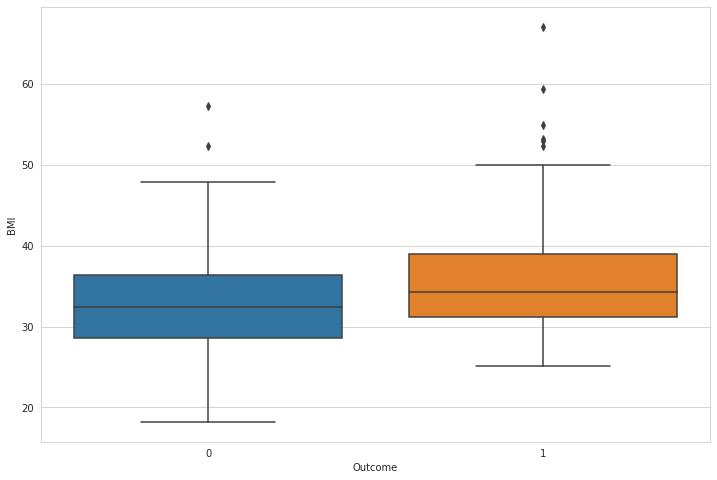

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=notNormalBMIData)

**Highlights**

The Body Mass Index (BMI) showed a significant association with the occurrence of diabetes and that even the normal weighted women were at almost 9 times risk of being diabetic in comparison to the overweight.

In addition, the interquartile range for the women who tested positive reaches a higher BMI than the IQR for those who tested negative. Therefore, women could have higher BMIs and not be outliers if they tested positive as opposed to negative, showing that more women who tested positive did, in fact, have higher BMIs than those who tested negative.

# Age vs Diabetes

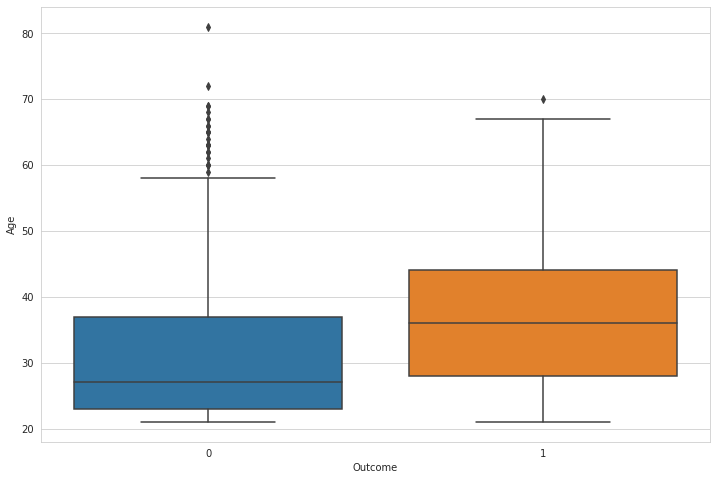

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='Age',data=diabetes_data)

In [ ]:
diabetes_data['Age'].value_counts().head()

22    72
21    63
25    48
24    46
23    38
Name: Age, dtype: int64

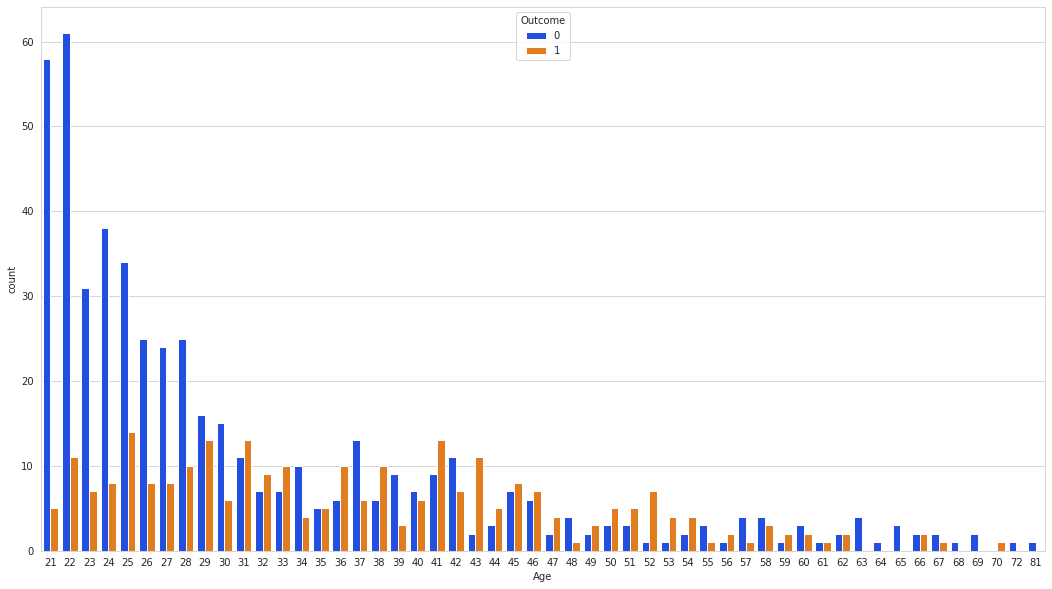

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(x='Age',data=diabetes_data,hue = 'Outcome', palette='bright')

**Highlights**

Significant relation can be seen between the age distribution and diabetic occurrence. Women at age group > 31 years were at higher risk to contract diabetes in comparison to the younger age group

# Prediction using KNN

**Standardize the Variables**

Standardization (also called z-score normalization) is the process of putting different variables on the same scale. 

Standardization transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of
  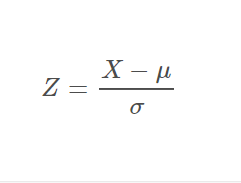

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(diabetes_data.drop('Outcome',axis=1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(diabetes_data.drop('Outcome',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=diabetes_data.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


# Train Test Split
Use train_test_split to split your data into a training set and a testing set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,diabetes_data['Outcome'],
                                                    test_size=0.30,random_state=101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# **Choosing a K Value**


Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.



In [ ]:
error_rate = []
test_scores = []
train_scores = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

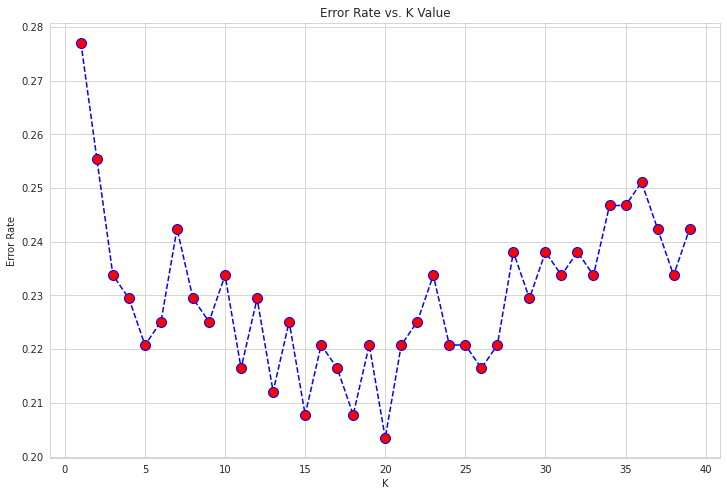

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 79.65367965367966 % and k = [20]


#Retrain with new K Value
Retrain your model with the best K value and re-do the classification report and the confusion matrix.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# NOW WITH K=20
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=20


[[134  16]
 [ 31  50]]


              precision    recall  f1-score   support

           0       0.81      0.89      0.85       150
           1       0.76      0.62      0.68        81

    accuracy                           0.80       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



# Result Visualisation

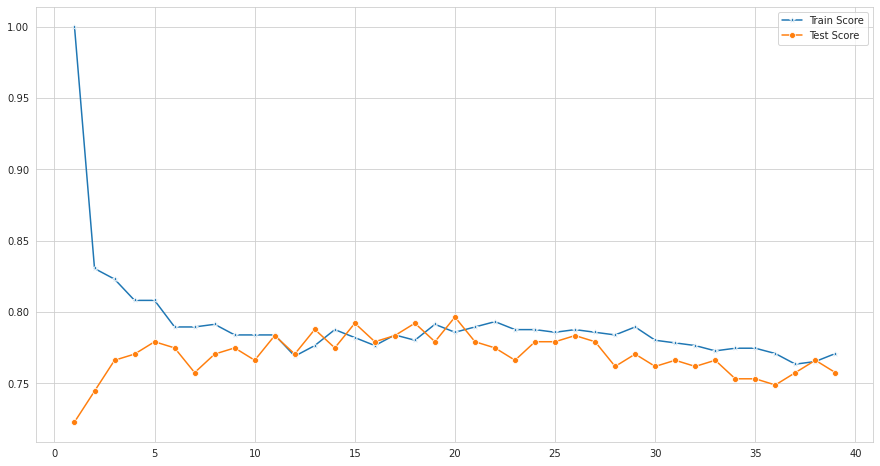

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(range(1,40),train_scores,marker='*',label='Train Score')
sns.lineplot(range(1,40),test_scores,marker='o',label='Test Score')

The best result is captured at k = 20 hence 20 is used for the final model

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(20)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7965367965367965

# Model Performance Analysis
**Confusion Matrix**


The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,134,16,150
1,31,50,81
All,165,66,231


Text(0.5, 15.0, 'Predicted label')

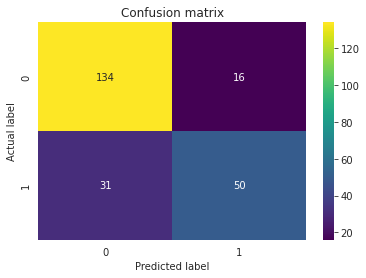

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Classification Report
Report which includes Precision, Recall and F1-Score.

**Precision Score**

Precision – Accuracy of positive predictions.

**Recall Score**

Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
Recall=TP(TP+FN)
 
**F1 Score**

F1 Score – A helpful metric for comparing two classifiers. F1 Score takes into account precision and the recall. It is created by finding the the harmonic mean of precision and recall

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       150
           1       0.76      0.62      0.68        81

    accuracy                           0.80       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Printing the Overall Accuracy of the model
print("Accuracy of the model : {0:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the model : 0.797
